In [15]:
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 25 10:30:58 2021

@author: tyx
"""

import pandas as pd
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('Data_new.csv')
data = data.loc[0:10]
data

,County,HospitalID,MedicareFr,RPR,RER,r,R,r/R-1,actual penalty,current revenue
0,Alameda,50002,0.385420,24.126127,22.505701,0.241,0.225,0.072,0.030,1.303
1,Humboldt,50006,0.463131,16.193045,19.058270,0.162,0.191,-0.150,0.000,1.193
2,San Mateo,50007,0.302269,20.862410,20.750566,0.209,0.208,0.005,0.005,1.262
3,Napa,50009,0.430666,20.507330,22.007002,0.205,0.220,-0.068,0.000,1.258
4,Napa,50013,0.487894,20.139364,21.881418,0.201,0.219,-0.080,0.000,1.252
5,San Luis Obispo,50016,0.446989,19.723122,19.851444,0.197,0.199,-0.006,0.000,1.246
6,Sacramento,50017,0.314865,19.069731,19.543978,0.191,0.195,-0.024,0.000,1.236
7,Los Angeles,50018,0.302417,24.074648,24.114084,0.241,0.241,-0.002,0.000,1.317
8,Riverside,50022,0.272430,21.809946,22.240143,0.218,0.222,-0.019,0.000,1.279
9,San Diego,50024,0.498079,24.792191,24.788952,0.248,0.248,0.000,0.000,1.330


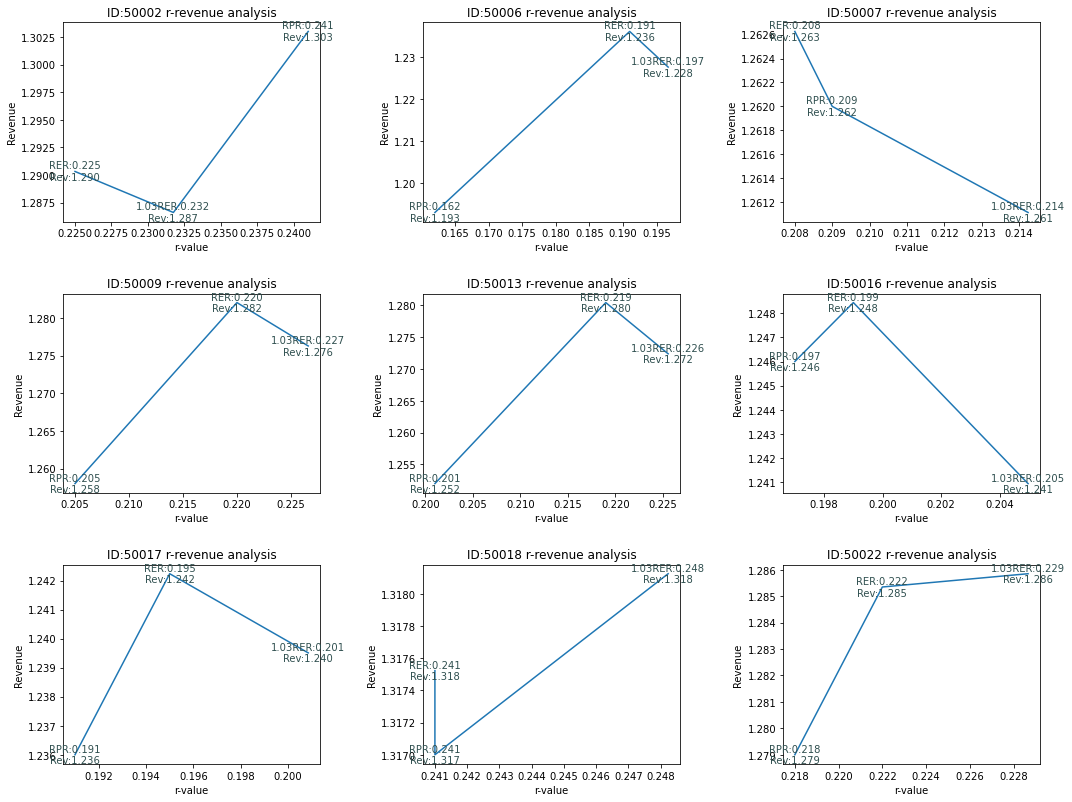

In [44]:
rows = int(np.ceil(len(data))/3)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows*(15/4)))
for i, ax in enumerate(fig.axes):
    if i < len(data):
        data_loop = data.loc[i:i]
        for index,row in data_loop.iterrows():
            #r1:current real r-value, r1=RPR/100
            #r2:target r-value, when r/RER-1=0, r2=RER
            #r3:highest-penalty r-value, when r/RER-1=0.03, r3=1.03*RER
            #for index,row in data.iterrows():
            #get r1&r2&r3,three revenue 
            Id=data.iloc[index,1]
            r1=data.iloc[index,5]
            cur_rev=data.iloc[index,9]
            r2=data.iloc[index,6]
            tar_rev=(1/(1-r2))
            r3=1.03*(data.iloc[index,6])
            pen_rev=(1/(1-r3)*(1-0.03*(data.iloc[index,2])))
            #jugde the order of r1,r2,r3
            if r1<r2:
                x=[]
                x=[r1,r2,r3]
                y=[]
                y=[cur_rev,tar_rev,pen_rev]
            elif r1>r3:
                x=[]
                x=[r2,r3,r1]
                y=[]
                y=[tar_rev,pen_rev,cur_rev]
            else:
                x=[]
                x=[r2,r1,r3]
                y=[]
                y=[tar_rev,cur_rev,pen_rev]       
            #line=plt.subplot(183,1,index+1)
            #plt.subplot(1,1,1)
            ax.plot(x,y)
            ax.set_title('ID:{} r-revenue analysis'.format(Id))
            ax.set_xlabel('r-value')
            ax.set_ylabel('Revenue')
            ax.annotate('RPR:{:.3f}\nRev:{:.3f}'.format(r1, cur_rev),
                         xy = (r1, cur_rev), ha='center', va='center', fontsize = 10, color = '#2F4F4F')
            ax.annotate('RER:{:.3f}\nRev:{:.3f}'.format(r2, tar_rev),
                         xy = (r2, tar_rev), ha='center', va='center', fontsize = 10, color = '#2F4F4F')
            ax.annotate('1.03RER:{:.3f}\nRev:{:.3f}'.format(r3, pen_rev),
                         xy = (r3, pen_rev), ha='center', va='center', fontsize = 10, color = '#2F4F4F')
    else:
        fig.delaxes(ax)

plt.tight_layout(w_pad=1.5, h_pad=2.5)
plt.savefig('test.png', bbox_inches='tight')